<a href="https://colab.research.google.com/github/BohdanShepel2005/Numerical-Methods-of-Programming/blob/main/%D0%9B%D0%91_%E2%84%968.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

# Задані точки
x = np.array([0.5, 0.9, 1.5, 2.3, 3])
y = np.array([1.54, 3.38, 2.53, 1.86, 4.35])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.54 + 5.8488(x - 0.5) + 0.0(x - 0.5)^2 + -7.805(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 2:
S_1(x) = 3.38 + 2.1024(x - 0.9) + -9.366(x - 0.9)^2 + 5.8348(x - 0.9)^3, x належить [0.9, 1.5]
Відрізок 3:
S_2(x) = 2.53 + -2.8352(x - 1.5) + 1.1366(x - 1.5)^2 + 1.7006(x - 1.5)^3, x належить [1.5, 2.3]
Відрізок 4:
S_3(x) = 1.86 + 1.122(x - 2.3) + 5.2181(x - 2.3)^2 + 2.4848(x - 2.3)^3, x належить [2.3, 3.0]


Значення сплайна:
x = 0.50, y = 1.540
x = 0.53, y = 1.755
x = 0.55, y = 1.955
x = 0.58, y = 2.139
x = 0.60, y = 2.310
x = 0.63, y = 2.466
x = 0.65, y = 2.609
x = 0.68, y = 2.738
x = 0.70, y = 2.855
x = 0.73, y = 2.959
x = 0.75, y = 3.052
x = 0.78, y = 3.133
x = 0.80, y = 3.204
x = 0.83, y = 3.264
x = 0.85, y = 3.313
x = 0.88, y = 3.353
x = 0.90, y = 3.384
x = 0.93, y = 3.407
x = 0.95, y = 3.420
x = 0.98, y = 3.426
x = 1.01, y = 3.425
x = 1.03, y = 3.416
x = 1.06, y = 3.401
x = 1.08, y = 3.380
x = 1.11, y = 3.353
x = 1.13, y = 3.321
x = 1.16, y = 3.284
x = 1.18, y = 3.243
x = 1.21, y = 3.197
x = 1.23, y = 3.149
x = 1.26, y = 3.097
x = 1.28, y = 3.042
x = 1.31, y = 2.986
x = 1.33, y = 2.927
x = 1.36, y = 2.868
x = 1.38, y = 2.807
x = 1.41, y = 2.746
x = 1.43, y = 2.685
x = 1.46, y = 2.625
x = 1.48, y = 2.565
x = 1.51, y = 2.507
x = 1.54, y = 2.450
x = 1.56, y = 2.395
x = 1.59, y = 2.342
x = 1.61, y = 2.290
x = 1.64, y = 2.241
x = 1.66, y = 2.193
x = 1.69, y = 2.148
x = 1.71, y = 2.105
x 

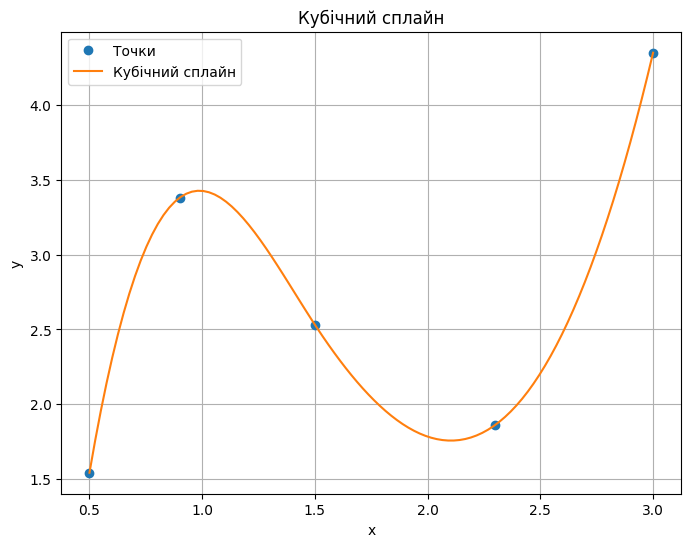

In [6]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.5, 0.9, 1.5, 2.3, 3])
y = np.array([1.54, 3.38, 2.53, 1.86, 4.35])

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Роздрукувати значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()